# **FITS to HDF5**

In [1]:
import numpy as np
import pandas as pd
import h5py
import astropy.table
from astropy.table import Table
import astropy.io.fits as pf

import matplotlib.pyplot as plt

import pandas as pd

In [3]:
filename = '/home/raulteixeira/scratch-midway2/CosmicShearData/pzinput/fits/shear_test_coadd_object_gold.fits'
data = Table.read(filename)

In [4]:
filename = '/home/raulteixeira/scratch-midway2/CosmicShearData/cuts/metacal_sample_ID.npz'
metacal_cuts = np.load(filename)['id']

In [5]:
coadd_ids = data['COADD_OBJECT_ID']
datadf = data.to_pandas()
datametacal = datadf.loc[datadf['COADD_OBJECT_ID'].isin(metacal_cuts)]

In [40]:
# print(metacal_cuts.size)
# print(data['COADD_OBJECT_ID'].size)
# print(len(metacal_cuts)/data['COADD_OBJECT_ID'].size)

# onesig = np.std(datametacal[datametacal[f'MAG_AUTO_G']!=99.0]['MAG_AUTO_G'])
# pd.set_option('display.max_columns', None)
# datametacal[datametacal[f'MAG_AUTO_G']==99.0] = datametacal.assign(MAGERR_AUTO_G=onesig)
# plt.yscale('log')
# plt.hist(datametacal[datametacal['MAG_AUTO_G']!=99]['MAGERR_AUTO_G'], bins=300)
# plt.show()
# plt.yscale('log')
# plt.hist(datametacal['MAGERR_AUTO_G'][datametacal['MAGERR_AUTO_G']>10])
# plt.show()
# plt.hist(datametacal[f'MAGERR_AUTO_G'][datametacal['MAG_AUTO_G']==99], bins=30)
# plt.show()

# datametacal[datametacal['MAG_AUTO_G']<30]['MAGERR_AUTO_G'].size/datametacal['MAGERR_AUTO_G'].size

# bandlist = ['G', 'R', 'I', 'Z']
# for band in bandlist:
#     plt.xlabel(f'{band}')
#     plt.ylabel(f'{band} error')
#     plt.scatter(datametacal[f'MAG_AUTO_{band}'], datametacal[f'MAGERR_AUTO_{band}'], s=.5)
#     plt.show()

# s/g cut Y3
# WAVG_SPREAD_MODEL_I = datametacal['WAVG_SPREAD_MODEL_I']
# WAVG_SPREADERR_MODEL_I = datametacal['WAVG_SPREADERR_MODEL_I']

# s1 = (WAVG_SPREAD_MODEL_I + 3. * WAVG_SPREADERR_MODEL_I) > 0.005
# s2 = (WAVG_SPREAD_MODEL_I + 1. * WAVG_SPREADERR_MODEL_I) > 0.003
# s3 = (WAVG_SPREAD_MODEL_I - 1. * WAVG_SPREADERR_MODEL_I) > 0.001
# ext_wavg = s1.astype(int) + s2.astype(int) + s3.astype(int)
# sg_mask = (ext_wavg>=2)
# onesig = np.std(datametacal[datametacal[f'MAG_AUTO_G']!=99]['MAG_AUTO_G'])
# print(onesig)
# datametacal[datametacal[f'MAG_AUTO_G']==99.0] = datametacal.assign(MAGERR_AUTO_G=onesig)
# print("ratio of objects filtered out", 1-np.sum(sg_mask)/len(sg_mask), "\n# of objects filtered out", len(sg_mask)-np.sum(sg_mask), "\n# of objects", len(sg_mask))

In [6]:
data = Table.from_pandas(datametacal)

In [7]:
b_mask = data['MAG_AUTO_G']!=99
data = data[b_mask]

In [7]:
data30 = data[data['MAG_AUTO_G']<30]

In [8]:
data.write('/home/raulteixeira/scratch-midway2/CosmicShearData/METACALgals.fits')

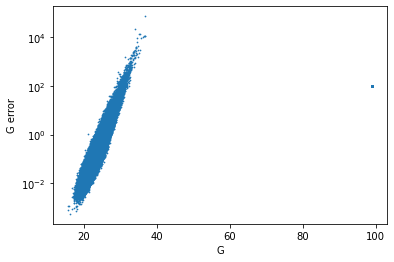

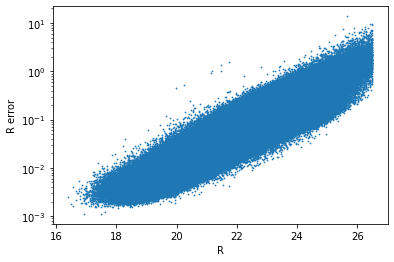

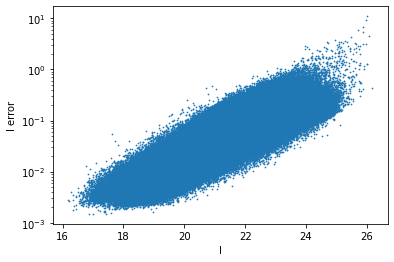

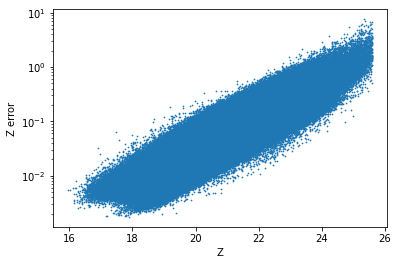

In [15]:
bandlist = ['G', 'R', 'I', 'Z']
for band in bandlist:
    plt.yscale('log')
    plt.xlabel(f'{band}')
    plt.ylabel(f'{band} error')
    plt.scatter(datametacal[f'MAG_AUTO_{band}'], datametacal[f'MAGERR_AUTO_{band}'], s=.5)
    plt.show()

In [8]:
tiles = np.unique(np.array(data['TILENAME']))

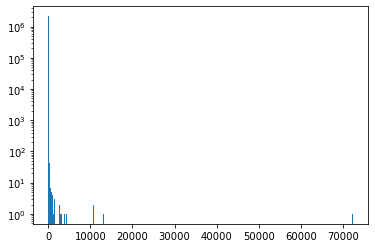

In [15]:
plt.yscale('log')
a = plt.hist(datametacal['MAGERR_AUTO_G'], bins=1000)

In [48]:
maxerr=.1
mask1 = datametacal['MAGERR_AUTO_G']<maxerr
mask2 = datametacal['MAGERR_AUTO_R']<maxerr
mask3 = datametacal['MAGERR_AUTO_I']<maxerr
mask4 = datametacal['MAGERR_AUTO_Z']<maxerr
errmask = np.logical_and(np.logical_and(mask1, mask2), np.logical_and(mask3, mask4))
print(mask1.sum()/datametacal['MAGERR_AUTO_G'].size)
print(mask2.sum()/datametacal['MAGERR_AUTO_G'].size)
print(mask3.sum()/datametacal['MAGERR_AUTO_G'].size)
print(mask4.sum()/datametacal['MAGERR_AUTO_G'].size)
print(errmask.sum()/datametacal['MAGERR_AUTO_G'].size)

0.3493877249724551
0.6442092917075625
0.6517550790530584
0.486666830705522
0.2715439974993188


In [37]:
#creating the table to be converted
for tile in np.unique(data['TILENAME']):
    #converting to pandas dataframe
    masktile=data['TILENAME']==tile
    table_i = data[masktile]['COADD_OBJECT_ID', 'TILENAME', 'MAG_AUTO_G', 'MAG_AUTO_R'\
                         , 'MAG_AUTO_I', 'MAG_AUTO_Z', 'MAGERR_AUTO_G', 'MAGERR_AUTO_R'\
                         , 'MAGERR_AUTO_I', 'MAGERR_AUTO_Z'] 
                         #[tab_all['extended_class']>1]
    dframe_i = pd.DataFrame(data=table_i['COADD_OBJECT_ID']\
                            , columns = ['COADD_OBJECT_ID'])
    for label in table_i.columns:
            dframe_i[label] = data[label][masktile]
    dframe_i.to_hdf(f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/pzinput/pzinput_METACAL_4_bands_{tile}.h5', key='df')

In [9]:
for tile in np.unique(data['TILENAME']):
    #converting to pandas dataframe
    masktile=data30['TILENAME']==tile
    table_i = data30[masktile]['COADD_OBJECT_ID', 'TILENAME', 'MAG_AUTO_G', 'MAG_AUTO_R'\
                         , 'MAG_AUTO_I', 'MAG_AUTO_Z', 'MAGERR_AUTO_G', 'MAGERR_AUTO_R'\
                         , 'MAGERR_AUTO_I', 'MAGERR_AUTO_Z'] 
                         #[tab_all['extended_class']>1]
    dframe_i = pd.DataFrame(data=table_i['COADD_OBJECT_ID']\
                            , columns = ['COADD_OBJECT_ID'])
    for label in table_i.columns:
            dframe_i[label] = data30[label][masktile]
    dframe_i.to_hdf(f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/pzinput/pzinput_METACAL_4_bands_30cut_{tile}.h5', key='df')

In [ ]:
tile = tiles[0].astype('str')

In [14]:
#converting to pandas dataframe
masktile=data['TILENAME']==tile
table_i = data[mask][masktile]['COADD_OBJECT_ID', 'TILENAME', 'MAG_AUTO_G', 'MAG_AUTO_R'\
                     , 'MAG_AUTO_I', 'MAG_AUTO_Z', 'MAGERR_AUTO_G', 'MAGERR_AUTO_R'\
                     , 'MAGERR_AUTO_I', 'MAGERR_AUTO_Z'] 
                     #[tab_all['extended_class']>1]
dframe_i = pd.DataFrame(data=table_i['COADD_OBJECT_ID']\
                        , columns = ['COADD_OBJECT_ID'])
for label in table_i.columns:
        dframe_i[label] = data[label][masktile]
dframe_i.to_hdf('/home/raulteixeira/photoz/CosmicShearData/bpztiles/pzinput/pz_input_gold_'+tile+'.h5', key='df')